In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
dataset = pd.read_csv(r'D:\#PROJECTS\churn-project\data\raw_telco.csv')
df = pd.DataFrame(dataset)
dataset.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


we can drop columns that we don't need (or has only one value)

In [40]:
for column in df.columns:
    if df[column].nunique(dropna=False) == 1:
        print(f"Column with only one unique value: {column}")

Column with only one unique value: Country
Column with only one unique value: State
Column with only one unique value: Quarter


In [41]:
df2 = df.drop(columns=['Country', 'State', 'Quarter', 'Customer ID'], inplace=False)
df2.head(3)

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


I will drop more columns that I don't need -> reasons -> see -> why_Drop.txt

In [42]:
columns_to_drop = [    
    "City",
    "Zip Code",
    "Latitude",
    "Longitude",
    "Population",
    
    "Customer Status",
    "Churn Score",
    "Churn Category",
    "Churn Reason",
    
    "Total Revenue",
    "Under 30",
    "Number of Dependents"
]

df3 = df2.drop(columns=columns_to_drop, errors='ignore')
df3.head(3)

,Gender,Age,Senior Citizen,Married,Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,Male,78,Yes,No,No,No,0,1,NaN,No,...,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,3,Yes,5433
1,Female,74,Yes,Yes,Yes,Yes,1,8,Offer E,Yes,...,Yes,Credit Card,80.65,633.30,0.00,0,390.80,3,Yes,5302
2,Male,71,Yes,No,Yes,No,0,18,Offer D,Yes,...,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,2,Yes,3179


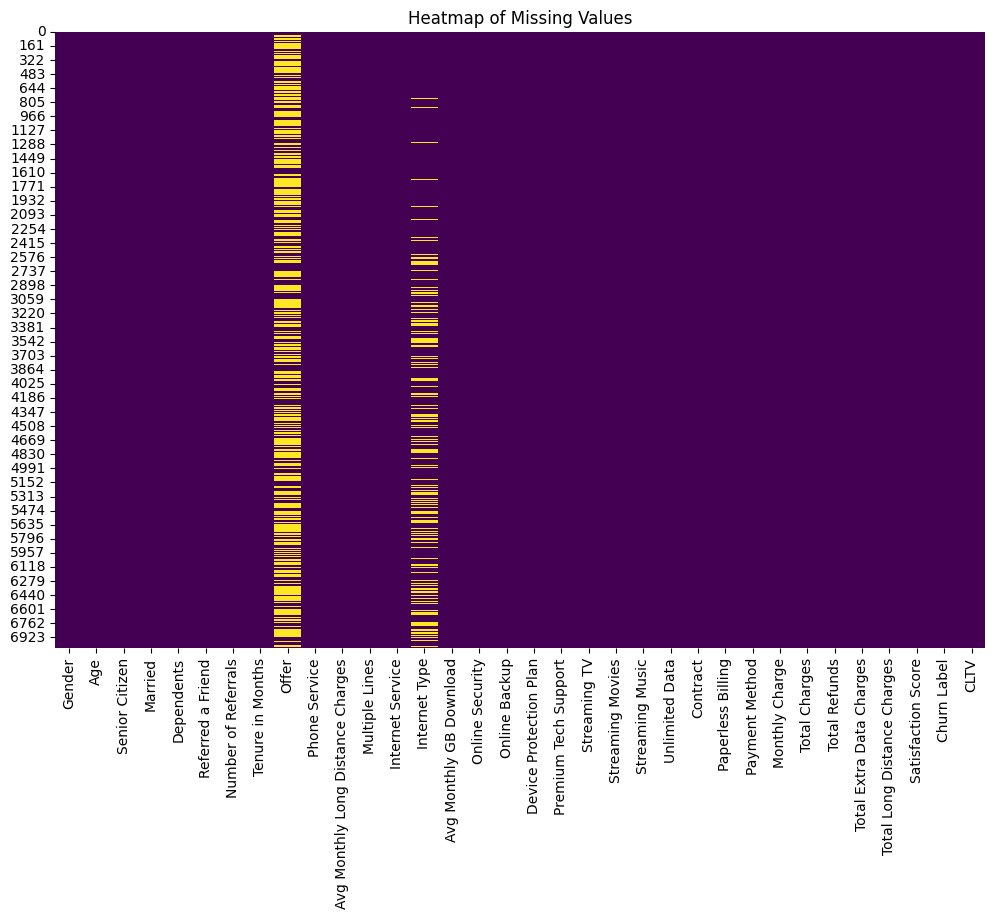

In [43]:
len(df3.columns)

df3.isnull().sum()

plt.figure(figsize=(12, 8))
sns.heatmap(df3.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

we can drop both null coulmns (offer and internet type) as we have a lot of null counts .(and internet service is also available)

In [55]:
df4 = df3.drop(columns=['Offer', 'Internet Type'], inplace=False)
df4.head(3)

df4.isnull().sum()
df4.isnull().sum().sum()

# now our dataset has no missing values as well as no unwanted columns.

np.int64(0)

In [58]:
df5 = df4.copy()
# Column with exactly two unique values
binary_columns = []
for column in df4.columns:
    uniques = df4[column].unique()
    if len(uniques) == 2:
        binary_columns.append(column)
        print(f"{column}: {uniques}")

print("\n\nColumns with exactly two unique values:")
for col in binary_columns:
    print(col)

binary_map = {
    "yes": 1, "no": 0,
    "male": 1, "female": 0
}

binary_cols = binary_columns

for col in binary_cols:
    df5[col] = (
        df5[col]
        .astype(str).str.strip().str.lower()
        .map(binary_map)
        .fillna(0)
    )

df5.head(3)

Gender: ['Male' 'Female']
Senior Citizen: ['Yes' 'No']
Married: ['No' 'Yes']
Dependents: ['No' 'Yes']
Referred a Friend: ['No' 'Yes']
Phone Service: ['No' 'Yes']
Multiple Lines: ['No' 'Yes']
Internet Service: ['Yes' 'No']
Online Security: ['No' 'Yes']
Online Backup: ['No' 'Yes']
Device Protection Plan: ['Yes' 'No']
Premium Tech Support: ['No' 'Yes']
Streaming TV: ['No' 'Yes']
Streaming Movies: ['Yes' 'No']
Streaming Music: ['No' 'Yes']
Unlimited Data: ['No' 'Yes']
Paperless Billing: ['Yes' 'No']
Churn Label: ['Yes' 'No']


Columns with exactly two unique values:
Gender
Senior Citizen
Married
Dependents
Referred a Friend
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection Plan
Premium Tech Support
Streaming TV
Streaming Movies
Streaming Music
Unlimited Data
Paperless Billing
Churn Label


,Gender,Age,Senior Citizen,Married,Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Satisfaction Score,Churn Label,CLTV
0,1,78,1,0,0,0,0,1,0,0.00,...,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,3,1,5433
1,0,74,1,1,1,1,1,8,1,48.85,...,1,Credit Card,80.65,633.30,0.00,0,390.80,3,1,5302
2,1,71,1,0,1,0,0,18,1,11.33,...,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,2,1,3179


In [65]:
df5.columns
df5.head(5)

for column in df5.columns:
    uniques = df5[column].dropna().unique()
    if len(uniques) != 2:
        print(f"\nColumn: {column}")
        print(f"Unique values ({len(uniques)}): {uniques}")


Column: Age
Unique values (62): [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]

Column: Number of Referrals
Unique values (12): [ 0  1  6  2  4  3  7  5  8  9 10 11]

Column: Tenure in Months
Unique values (72): [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]

Column: Avg Monthly Long Distance Charges
Unique values (3584): [ 0.   48.85 11.33 ... 44.99 44.98  8.62]

Column: Avg Monthly GB Download
Unique values (50): [ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46]

Column: Contract
Unique values (3): ['Month-to-Month' 'One Year' 'Two Year']

Column: Payment Method
Unique v

In [81]:
string_columns = df5.select_dtypes(include=['object', 'string']).columns.tolist()

print(string_columns)

cat_columns = string_columns

df6 = pd.get_dummies(df5, columns=cat_columns, drop_first=True)

df6.head(3)


if 'Contract' in df6.columns:
    print("✅ The dataset contain")
else:
    print("❌ The dataset does NOT contain.")

['Contract', 'Payment Method']
❌ The dataset does NOT contain.


In [91]:
# now we have four columns with binary values(bool columns)

df6.dtypes
"""
Contract_One Year                       bool
Contract_Two Year                       bool
Payment Method_Credit Card              bool
Payment Method_Mailed Check             bool
"""

bool_columns = [
    'Contract_One Year',
    'Contract_Two Year',
    'Payment Method_Credit Card',
    'Payment Method_Mailed Check'       
]   

for col in bool_columns:
    df6[col] = df6[col].astype(int)


df6.dtypes
df6.to_csv(r'D:\#PROJECTS\churn-project\data\cleaned_telco.csv', index=False)